In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import statistics as stats
%matplotlib inline
import plotly.express as px
import nbformat
from scipy.stats import linregress


In [2]:
Data = pd.read_csv('apple_products.csv')
Data.head()

,Product Name,Product URL,Brand,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Upc,Star Rating,Ram
0,"APPLE iPhone 8 Plus (Gold, 64 GB)",https://www.flipkart.com/apple-iphone-8-plus-g...,Apple,49900,49900,0,3431,356,MOBEXRGV7EHHTGUH,4.6,2 GB
1,"APPLE iPhone 8 Plus (Space Grey, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVAC6TJT4F,4.6,2 GB
2,"APPLE iPhone 8 Plus (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVGETABXWZ,4.6,2 GB
3,"APPLE iPhone 8 (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-silver...,Apple,77000,77000,0,11202,794,MOBEXRGVMZWUHCBA,4.5,2 GB
4,"APPLE iPhone 8 (Gold, 256 GB)",https://www.flipkart.com/apple-iphone-8-gold-2...,Apple,77000,77000,0,11202,794,MOBEXRGVPK7PFEJZ,4.5,2 GB


C:\Users\9ayus\AppData\Local\Temp\ipykernel_18428\2473482717.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Data.corr(),annot=True)


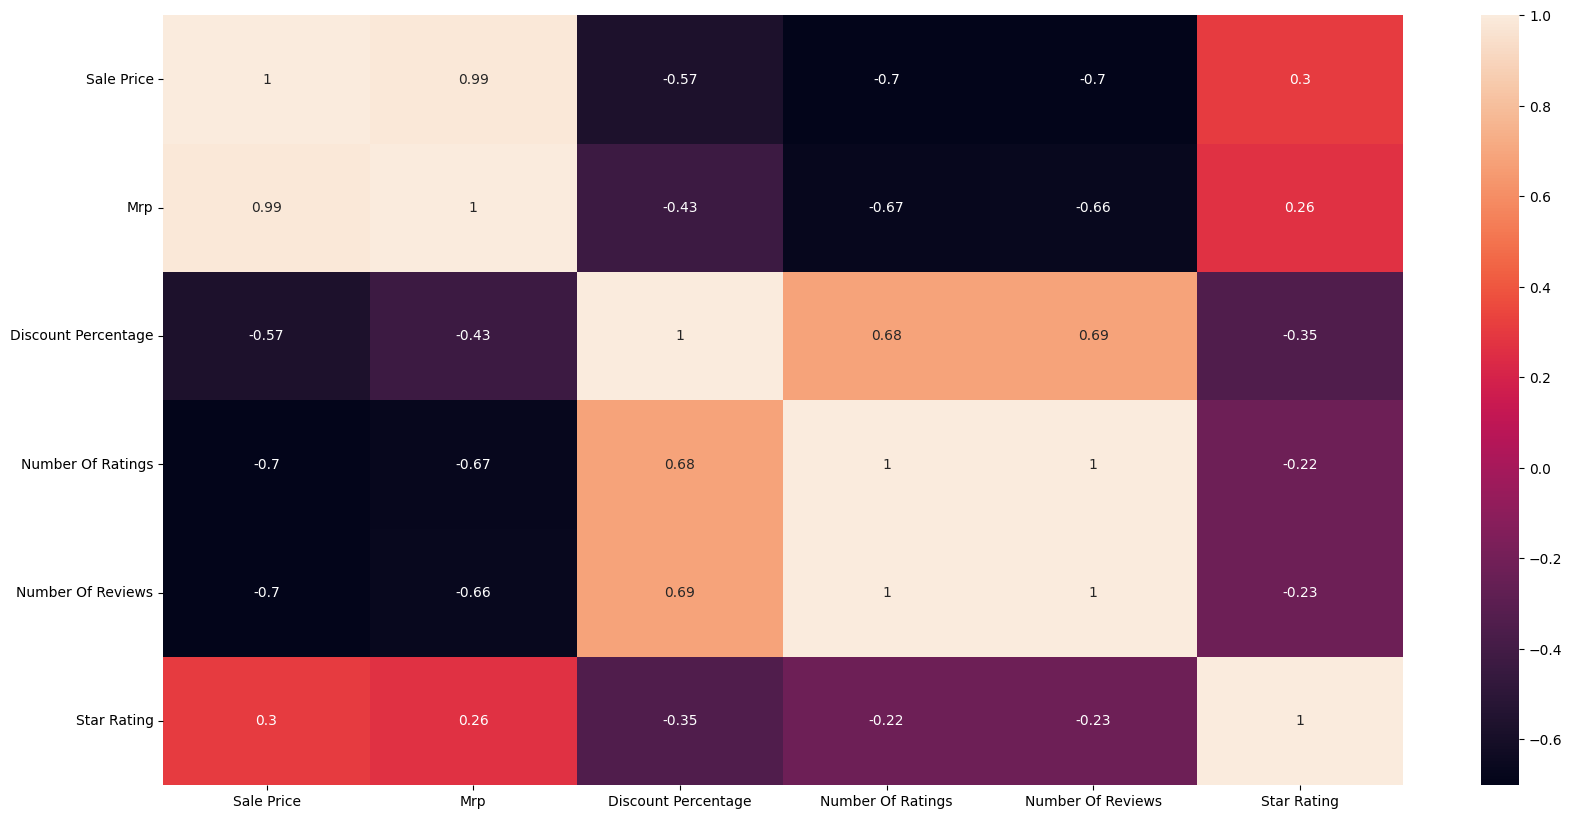

In [3]:
# Correleation Matrix for entire dataset
plt.figure(figsize=(20,10))
sns.heatmap(Data.corr(),annot=True)
plt.show()

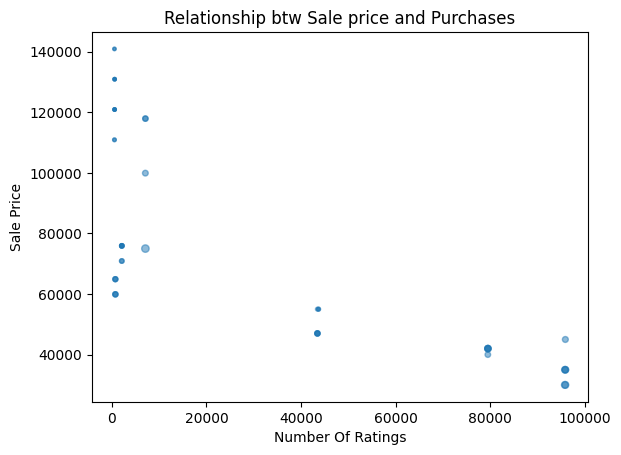

In [4]:
plt.scatter(Data['Number Of Ratings'], Data['Sale Price'], s=Data['Discount Percentage'], alpha=0.5)
plt.title('Relationship btw Sale price and Purchases')
plt.xlabel('Number Of Ratings')
plt.ylabel('Sale Price')
plt.show()

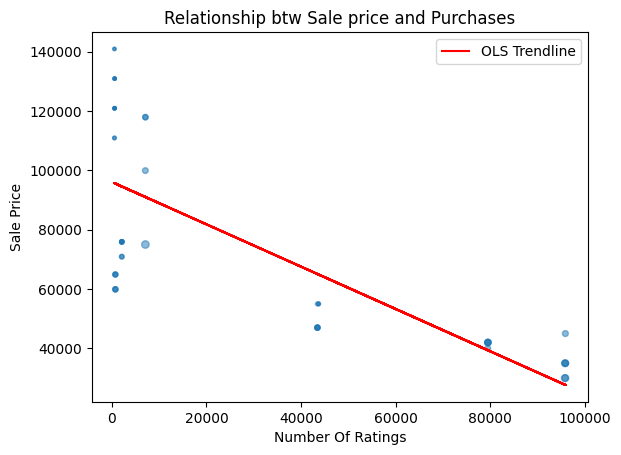

In [5]:
# Define x and y variables
x = Data['Number Of Ratings']
y = Data['Sale Price']
s = Data['Discount Percentage']

# Calculate OLS regression line
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
line = slope*x + intercept

# Create scatter plot with trendline
fig, ax = plt.subplots()
ax.scatter(x, y, s=s, alpha=0.5)
ax.plot(x, line, color='red', label='OLS Trendline')
ax.set_title('Relationship btw Sale price and Purchases')
ax.set_xlabel('Number Of Ratings')
ax.set_ylabel('Sale Price')
ax.legend()

plt.show()




#### According to the trendline we can see that the iphones with most number of ratings are around 40000. Which means people tends to buy iphones with lower sale price.

In [6]:
# Calculate the mean of the 'Number Of Ratings' column
x_mean = Data['Number Of Ratings'].mean()
# x_mean
y_mean = Data['Sale Price'].mean()
# y_mean
print(x_mean)
print(y_mean)

22420.40322580645
80073.8870967742


In [7]:
def b1(Data):
    # Define the x and y values for the line
    x_value = Data['Number Of Ratings']
    y_value = Data['Sale Price']
    x_mean = Data['Number Of Ratings'].mean()
    y_mean = Data['Sale Price'].mean()
    numerator = sum((x_value - x_mean) * (y_value - y_mean)) 
    denominator = sum((x_value - x_mean) ** 2)
    # numerator = sum([(x_mean[i] - x_mean) * (y_mean[i] - y_mean) for i in range(len(Data))])
    # denominator = sum([(x_mean[i] - x_mean)**2 for i in range(len(Data))])
    b1 = numerator / denominator
    return b1
# b1(Data)

print('x mean')
print(x_mean)

print('y mean')
print(y_mean)

print('b1')
print(b1(Data))

print('equation for b0')
print('b0 = y_mean - b1(Data) * x_mean')

b0 = y_mean - b1(Data) * x_mean
print(f'b0 = {b0}')

x mean
22420.40322580645
y mean
80073.8870967742
b1
-0.7127827233737318
equation for b0
b0 = y_mean - b1(Data) * x_mean
b0 = 96054.76316720172


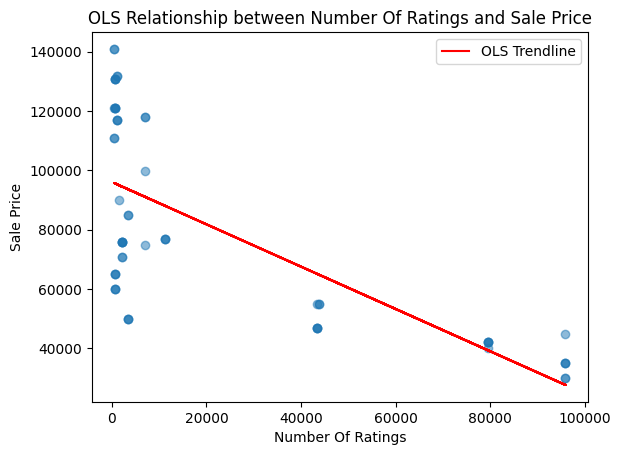

In [8]:
# Define the x and y values for the line
x_value = Data['Number Of Ratings']
y_value = Data['Sale Price']

# Calculate the slope and y-intercept
b1_value = b1(Data)
b0 = y_mean - b1_value * x_mean

# Define the range of x values to plot the line
x_min = x_value.min()
x_max = x_value.max()
x_range = [x_min, x_max]

# Calculate the corresponding y values for the line
y_range = [b1_value * x + b0 for x in x_range]

# Plot the line and the scatter plot of the data
fig, ax = plt.subplots()
ax.scatter(x_value, y_value, alpha=0.5)
ax.plot(x, line, color='red', label='OLS Trendline')
ax.set_title('OLS Relationship between Number Of Ratings and Sale Price')
ax.set_xlabel('Number Of Ratings')
ax.set_ylabel('Sale Price')
ax.legend()

plt.show()

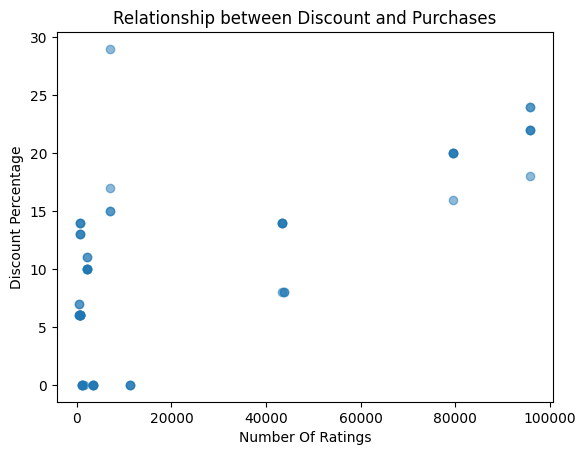

In [9]:
# Relationship between Number Of Ratings and Discount Percentage

plt.scatter(Data['Number Of Ratings'], Data['Discount Percentage'], alpha=0.5)
plt.title('Relationship between Discount and Purchases')
plt.xlabel('Number Of Ratings')
plt.ylabel('Discount Percentage')
plt.show()

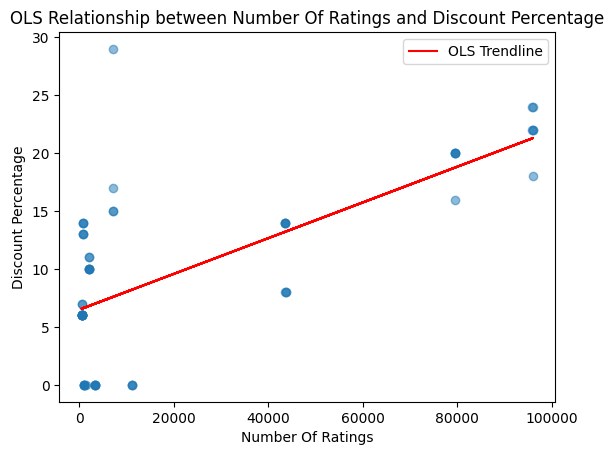

In [10]:
# Define x and y variables
x = Data['Number Of Ratings']
y = Data['Discount Percentage']

# Calculate OLS regression line
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
line = slope*x + intercept

# Create scatter plot with trendline
fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.5)
ax.plot(x, line, color='red', label='OLS Trendline')
ax.set_title('OLS Relationship between Number Of Ratings and Discount Percentage')
ax.set_xlabel('Number Of Ratings')
ax.set_ylabel('Discount Percentage')
ax.legend()

plt.show()

#### As per the tendline, the phones with greater discount are bought more.

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
# from statsmodels.sandbox.regression.ivreg import IV2SLS
# from linearmodels.iv import IV2SLS

In [12]:
Data['const'] = 1
Data.head()

,Product Name,Product URL,Brand,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Upc,Star Rating,Ram,const
0,"APPLE iPhone 8 Plus (Gold, 64 GB)",https://www.flipkart.com/apple-iphone-8-plus-g...,Apple,49900,49900,0,3431,356,MOBEXRGV7EHHTGUH,4.6,2 GB,1
1,"APPLE iPhone 8 Plus (Space Grey, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVAC6TJT4F,4.6,2 GB,1
2,"APPLE iPhone 8 Plus (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVGETABXWZ,4.6,2 GB,1
3,"APPLE iPhone 8 (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-silver...,Apple,77000,77000,0,11202,794,MOBEXRGVMZWUHCBA,4.5,2 GB,1
4,"APPLE iPhone 8 (Gold, 256 GB)",https://www.flipkart.com/apple-iphone-8-gold-2...,Apple,77000,77000,0,11202,794,MOBEXRGVPK7PFEJZ,4.5,2 GB,1


In [13]:
reg1 = sm.OLS(endog=Data['Number Of Ratings'], exog=Data[['const', 'Discount Percentage']], \
    missing='drop')
type(reg1)

statsmodels.regression.linear_model.OLS

In [14]:
results = reg1.fit()
type(results)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [15]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      Number Of Ratings   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     52.99
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           8.34e-10
Time:                        23:38:29   Log-Likelihood:                -714.34
No. Observations:                  62   AIC:                             1433.
Df Residuals:                      60   BIC:                             1437.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -7828.6852   5

In [16]:
mean_expr = np.mean(Data['Discount Percentage'])
mean_expr

9.951612903225806

In [17]:
predicted_Discount = 4.63 + 0.53 * 7.07
predicted_Discount

8.3771

In [18]:
results.predict(exog=[1, mean_expr])

array([22420.40322581])

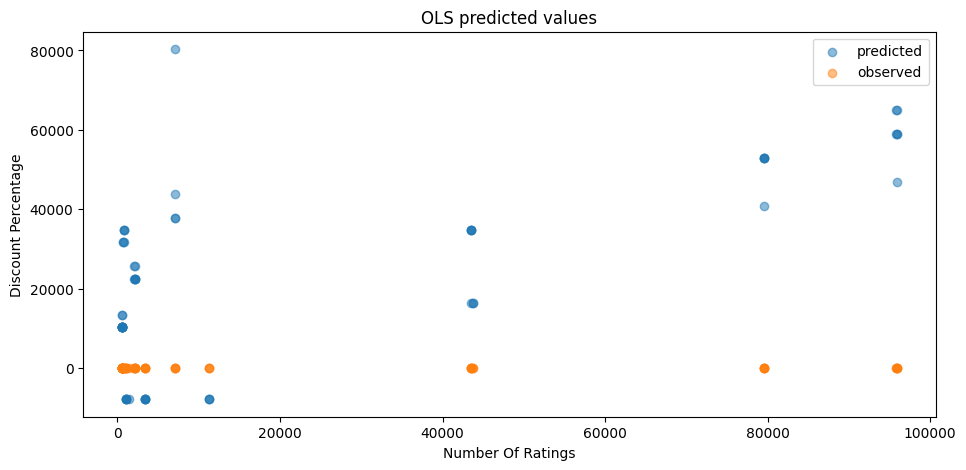

In [19]:
# Drop missing observations from whole sample

df2_plot = Data.dropna(subset=['Discount Percentage', 'Number Of Ratings'])

# Plot predicted values

fix, ax = plt.subplots()
ax.scatter(df2_plot['Number Of Ratings'], results.predict(), alpha=0.5,
        label='predicted')

# Plot observed values

ax.scatter(df2_plot['Number Of Ratings'], df2_plot['Discount Percentage'], alpha=0.5,
        label='observed')

ax.legend()
ax.set_title('OLS predicted values')
ax.set_xlabel('Number Of Ratings')
ax.set_ylabel('Discount Percentage')
plt.show()

In [20]:
reg2 = sm.OLS(endog=Data['Number Of Ratings'], exog=Data[['const', 'Sale Price']], \
    missing='drop')
type(reg2)

statsmodels.regression.linear_model.OLS

In [21]:
results2 = reg2.fit()
type(results2)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [22]:
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:      Number Of Ratings   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     58.14
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           2.14e-10
Time:                        23:38:30   Log-Likelihood:                -712.96
No. Observations:                  62   AIC:                             1430.
Df Residuals:                      60   BIC:                             1434.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.771e+04   7878.305      9.863      0.0

In [23]:
mean_expr2 = np.mean(Data['Sale Price'])
mean_expr2

80073.8870967742

In [24]:
predicted_Sale_Price = 4.63 + 0.53 * 7.07
predicted_Sale_Price

8.3771

In [25]:
results.predict(exog=[1, mean_expr2])

array([2.43386093e+08])

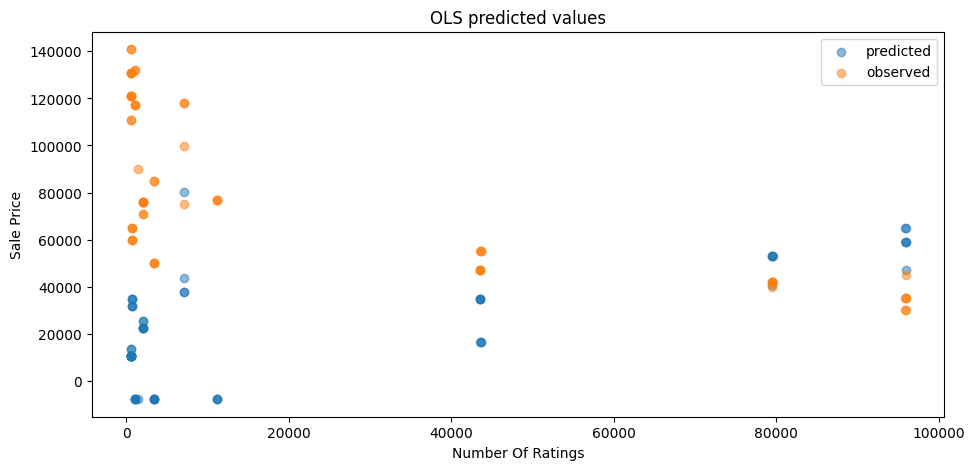

In [26]:
# Drop missing observations from whole sample

df2_plot = Data.dropna(subset=['Sale Price', 'Number Of Ratings'])

# Plot predicted values

fix, ax = plt.subplots()
ax.scatter(df2_plot['Number Of Ratings'], results.predict(), alpha=0.5,
        label='predicted')

# Plot observed values

ax.scatter(df2_plot['Number Of Ratings'], df2_plot['Sale Price'], alpha=0.5,
        label='observed')

ax.legend()
ax.set_title('OLS predicted values')
ax.set_xlabel('Number Of Ratings')
ax.set_ylabel('Sale Price')
plt.show()

### 2SLS

In [27]:
# Fit the first stage regression and print summary
results_fs = sm.OLS(Data['Sale Price'],
                    Data[['const', 'Number Of Ratings']],
                    missing='drop').fit()
print(results_fs.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale Price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     58.14
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           2.14e-10
Time:                        23:38:30   Log-Likelihood:                -713.94
No. Observations:                  62   AIC:                             1432.
Df Residuals:                      60   BIC:                             1436.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              9.605e+04   3767.76

In [28]:
# Second stage

Data['predicted_sale_price'] = results_fs.predict()

results_ss = sm.OLS(Data['Number Of Ratings'],
                    Data[['const', 'predicted_sale_price']]).fit()
print(results_ss.summary())

                            OLS Regression Results                            
Dep. Variable:      Number Of Ratings   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.163e+32
Date:                Tue, 07 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:38:30   Log-Likelihood:                 1428.0
No. Observations:                  62   AIC:                            -2852.
Df Residuals:                      60   BIC:                            -2848.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.348e+05 

In [30]:
from linearmodels.iv import IV2SLS


iv = IV2SLS(dependent=Data['Number Of Ratings'],
            exog=Data['const'],
            endog=Data['Sale Price'],
            instruments=Data['Number Of Ratings']).fit(cov_type='unadjusted')

print(iv.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:      Number Of Ratings   R-squared:                     -0.0319
Estimator:                    IV-2SLS   Adj. R-squared:                -0.0491
No. Observations:                  62   F-statistic:                    60.081
Date:                Wed, Mar 08 2023   P-value (F-stat)                0.0000
Time:                        00:25:40   Distribution:                  chi2(1)
Cov. Estimator:            unadjusted                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const       1.348e+05  1.512e+04     8.9105     0.0000   1.051e+05   1.644e+05
Sale Price    -1.4030     0.1810    -7.7512     0.00